# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Gery Jonathan Manurung
- **Email:** geryjonathan21@gmail.com
- **ID Dicoding:** gery_jonathan

## Menentukan Pertanyaan Bisnis

=======================================================================<br/>
**1. No:** 		    Row number                              <br/>
**2. year:**    	Year of data in this row                <br/>
**3. month:** 	    Month of data in this row               <br/>
**4. day:** 	    Day of data in this row                 <br/>
**5. hour:** 	    Hour of data in this row                <br/>
**6. PM2.5:** 	    PM2.5 concentration (ug/m^3)            <br/>
**7. PM10:** 	    PM10 concentration (ug/m^3)             <br/>
**8. SO2:** 	    SO2 concentration (ug/m^3)              <br/>
**9. NO2:** 	    NO2 concentration (ug/m^3)              <br/>
**10. CO:** 	    CO concentration (ug/m^3)           	<br/>
**11. O3:** 	    O3 concentration (ug/m^3)           	<br/>
**12. TEMP:**   	Temperature (degree Celsius)            <br/>
**13. PRES:** 	    Pressure (hPa)                          <br/>
**14. DEWP:** 	    Dew point temperature (degree Celsius)  <br/>
**15. RAIN:** 	    Precipitation (mm)                      <br/>
**16. wd:** 		Wind direction                          <br/>
**17. WSPM:** 	    Wind speed (m/s)                        <br/>
**18. station:**	Name of the air-quality monitoring site <br/>

==========================================================================

Problem Statement:
Partikel matter, umumnya disingkat sebagai PM dan digunakan sebagai ukuran polusi udara, secara signifikan memengaruhi masyarakat. Meskipun partikel dengan diameter 10 mikron atau kurang (≤PM10) dapat menembus dan terbenam dalam paru-paru, yang lebih berbahaya bagi kesehatan adalah yang memiliki diameter 2,5 mikron atau kurang (≤PM2.5). Maka dari itu muncul 3 pertanyaan
- Bagaimana perubahan tingkatan PM2.5 dalam tahun, bulan, dan hari?
- Apa hubungan variabel SO2, NO2, dan CO terhadap perubahan tingkatan PM?
- Stasiun manakah yang memiliki tingkat polutan terendah dan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from geopy.geocoders import Nominatim
import folium 
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [3]:
#Mengumpulkan seluruh relative file path csv kedalam allFiles
filePath = 'data'
allFiles = glob.glob(filePath + "/*.csv")
print(allFiles)

#Membaca dan menggabungkan tiap csv yang ada menjadi satu data frame
li = []
for i in allFiles:
    print(i)
    dfa = pd.read_csv(i, index_col=None, header=0)
    li.append(dfa)
df = pd.concat(li, axis=0, ignore_index=True)
df

['data\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'data\\PRSA_Data_Changping_20130301-20170228.csv', 'data\\PRSA_Data_Dingling_20130301-20170228.csv', 'data\\PRSA_Data_Dongsi_20130301-20170228.csv', 'data\\PRSA_Data_Guanyuan_20130301-20170228.csv', 'data\\PRSA_Data_Gucheng_20130301-20170228.csv', 'data\\PRSA_Data_Huairou_20130301-20170228.csv', 'data\\PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'data\\PRSA_Data_Shunyi_20130301-20170228.csv', 'data\\PRSA_Data_Tiantan_20130301-20170228.csv', 'data\\PRSA_Data_Wanliu_20130301-20170228.csv', 'data\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']
data\PRSA_Data_Aotizhongxin_20130301-20170228.csv
data\PRSA_Data_Changping_20130301-20170228.csv
data\PRSA_Data_Dingling_20130301-20170228.csv
data\PRSA_Data_Dongsi_20130301-20170228.csv
data\PRSA_Data_Guanyuan_20130301-20170228.csv
data\PRSA_Data_Gucheng_20130301-20170228.csv
data\PRSA_Data_Huairou_20130301-20170228.csv
data\PRSA_Data_Nongzhanguan_20130301-20170228.csv
data\PRSA_Data_Shunyi

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
#Memeriksa jumlah missing value
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
#Mencari persentase missing value dari jumlah kolom
round(df.isnull().sum()/len(df.index), 2)*100

No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      2.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Dari hasil diatas, terdapat beberapa missing value pada PM2.5, PM10, SO2,NO2, CO, dan O3.

In [7]:
#Memeriksa jumlah data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Dari tabel diatas dapat dilihat beberapa kolom memiliki indikasi outlier dari nilai maksimumnya

Memeriksa outliers

### Cleaning Data

Karena data yang dimiliki merupakan data time series maka kita akan mengisi missing value dengan metode interpolate()

In [9]:
df.interpolate(method='linear', limit_direction='forward', inplace=True)

Dapat dilihat bahwa seluruh data telah terisi

In [10]:
round(df.isnull().sum()/len(df.index), 2)*100

No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

In [11]:
#Drop kolom 'No' karena tidak dibutuhkan
df = df.drop(columns=['No'])

df = df[df['station'] != 'Wanshouxigong']

In [12]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385699,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
385700,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
385701,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
385702,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [13]:
loc = Nominatim(user_agent="Geopy Library")

# Get unique station names
unique_stations = df['station'].unique()

# Function to get latitude and longitude from the station name
def get_lat_long(station_name):
    location = loc.geocode(station_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create a dictionary to store the unique stations and their corresponding coordinates
station_coordinates = {'station': [], 'latitude': [], 'longitude': []}

# Iterate through unique stations and append the coordinates to the dictionary
for station in unique_stations:
    lat, long = get_lat_long(station)
    station_coordinates['station'].append(station)
    station_coordinates['latitude'].append(lat)
    station_coordinates['longitude'].append(long)

# Create a DataFrame from the dictionary
station_df = pd.DataFrame(station_coordinates)

# Merge the original DataFrame with the new station DataFrame based on the "station" column
df = pd.merge(df, station_df, on='station', how='left')

# Display the updated DataFrame
print(df)

        year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
385699  2017      2   28    19   11.0  27.0   4.0  20.0  300.0  81.0  12.6   
385700  2017      2   28    20   15.0  43.0   6.0  55.0  500.0  45.0   9.4   
385701  2017      2   28    21   13.0  35.0   7.0  48.0  500.0  48.0   8.7   
385702  2017      2   28    22   12.0  31.0   5.0  47.0  500.0  50.0   7.8   
385703  2017      2   28    23    7.0  25.0   6.0  86.0  700.0  11.0   7.0   

          PRES  DEWP  RAIN   wd  WSPM       station   latitude 

In [15]:
# def visualize_map(df, selected_year=None, selected_month=None, selected_day=None):
#     # Filter the DataFrame based on selected year, month, and day
#     filtered_df = df.copy()

#     if selected_year:
#         filtered_df = filtered_df[filtered_df['year'] == selected_year]
#     if selected_month:
#         filtered_df = filtered_df[filtered_df['month'] == selected_month]
#     if selected_day:
#         filtered_df = filtered_df[filtered_df['day'] == selected_day]

#     # Create a folium map
#     map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
#     my_map = folium.Map(location=map_center, zoom_start=12)

#     # Create a MarkerCluster layer for efficient handling of large datasets
#     marker_cluster = MarkerCluster().add_to(my_map)

#     # Add markers for each row in the filtered DataFrame
#     for index, row in filtered_df.iterrows():
#         folium.Marker([row['latitude'], row['longitude']], popup=row['station']).add_to(marker_cluster)

#     return my_map

# # Example usage:
# # Assuming df is your DataFrame with 'latitude' and 'longitude' columns



def visualize_map(df, selected_year=None, selected_month=None, selected_day=None):
    # Filter the DataFrame based on selected year, month, and day
    filtered_df = df.copy()

    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_month:
        filtered_df = filtered_df[filtered_df['month'] == selected_month]
    if selected_day:
        filtered_df = filtered_df[filtered_df['day'] == selected_day]

    # Create a folium map
    map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Create a MarkerCluster layer for efficient handling of large datasets
    marker_cluster = MarkerCluster().add_to(my_map)

    # Add markers for each row in the filtered DataFrame with 'PM2.5' values in the popup
    for index, row in filtered_df.iterrows():
        popup_text = f"Station: {row['station']}<br>PM2.5: {row['PM2.5']:.2f}"
        folium.Marker([row['latitude'], row['longitude']], popup=folium.Popup(popup_text, parse_html=True)).add_to(marker_cluster)

    return my_map


# Example usage:
# Assuming df is your DataFrame with 'latitude', 'longitude', 'WSPM', 'wd', and other columns
# visualize_map(df, selected_year=2022, selected_month=3, selected_day=4)

visualize_map(df, selected_year=2014, selected_month=3, selected_day=4)

In [23]:

# Function to create a Folium map based on year, month, and day
def create_map(year, month, day):
    # Filter data based on the specified date
    filtered_data = df[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

    # Create a map centered around Beijing
    m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

    # Add markers for each station with pollution data
    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"PM2.5: {row['PM2.5']} ug/m^3, Station: {row['station']}",
            icon=folium.Icon(color='red' if row['PM2.5'] > 50 else 'green')
        ).add_to(m)

    # Display the map within the notebook
    display(m)

# Example: Display the map for a specific date
create_map(year=2014, month=1, day=1)


In [ ]:
df.to_csv("dashboard/airquality.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Variabel Polutan

Menggelompokkan polutan berdasarkan Tahun dan Bulan menggunakan groupby

In [ ]:
# Data Polutan berdasarkan tahun dan bulan

df.groupby(["year","month"]).agg({
        "PM2.5" : "mean",
        "PM10" : "mean",
        "SO2" : "mean",
        "NO2" : "mean",
        "CO" : "mean",
    })

PM2.5        PM10        SO2        NO2           CO
year month                                                           
2013 3      104.378543  130.254949  38.226192  67.631719  1439.768695
     4       60.689457   96.113415  20.564917  46.447524   883.442006
     5       81.886180  134.897086  26.353228  49.951933   990.462648
     6      101.148860  115.629795  13.512500  47.598883  1314.124192
     7       66.720494   76.669297   7.225421  38.085973   961.300955
     8       60.696481   77.085716   6.895403  38.401730   868.272469
     9       77.490559   94.485824   9.895317  51.023804  1137.271338
     10      91.109088  110.740197  15.609844  62.353512  1209.628543
     11      72.866351   94.840909  21.687053  55.626209  1408.731197
     12      76.873778   93.723485  37.956149  59.672488  1652.773573
2014 1       96.697397  120.687867  52.620479  64.236029  1941.892717
     2      153.446496  154.897389  56.951502  71.657039  2171.827652
     3       94.907869  134.217925  34.266740  63.198314  1385.355572
     4       92.291730  144.394444  16.980366  57.493750   910.498737
     5       61.950900  116.818712  15.134194  47.266358   824.485220
     6       54.108249   73.388177   6.275853  38.660641   781.220071
     7       89.477285  109.734561   6.660020  37.630780   934.292522
     8       63.042730   84.933138   5.498754  41.097410   825.812561
     9       65.552058   89.643220   6.776199  47.618535   974.400253
     10     120.035007  146.797715   9.044660  69.388074  1321.236559
     11      85.842973  124.008371  16.646124  64.660429  1549.968434
     12      57.245520   93.796752  27.701531  51.671597  1508.477924
2015 1       95.470096  112.385696  33.847399  65.043377  1891.778674
     2       92.161675  119.595522  26.505371  50.376190  1445.488366
     3       86.267284  145.231073  20.566624  53.370817  1179.588221
     4       71.784066  114.632910   9.247967  45.269998   748.308081
     5       55.841111   95.807930   8.696175  36.850367   716.446725
     6       60.793005   80.485126   6.691793  34.562879  1068.535354
     7       60.886547   75.237085   4.781342  34.129216   799.327957
     8       44.155059   64.570687   3.638991  29.331378   768.010753
     9       48.365088   62.790720   4.890088  40.390278   796.830808
     10      69.523216   88.461694   5.893145  51.704423   935.642717
     11     113.759912  119.214962  11.520265  59.559912  1921.852904
     12     147.867913  157.705034  18.861437  74.242852  2762.918500
2016 1       66.029753   81.991080  19.464870  50.339870  1557.209189
     2       42.311912   56.871865  14.334248  33.405434   877.899687
     3       91.919538  134.727334  17.520833  55.392045  1209.469697
     4       67.675821  114.524432   9.664394  41.923864   774.842172
     5       54.316993   86.044941   7.971078  36.101918   675.114858
     6       58.306153   75.600657   4.996616  34.067159   733.997475
     7       68.141984   76.737659   3.492058  31.329851   884.789558
     8       45.371151   57.487170   2.877077  32.324963   806.400569
     9       53.543308   67.739331   3.440720  39.715025   741.180556
     10      85.742669  101.209983   4.409189  52.594514  1114.833822
     11      96.623737  129.774684  11.178056  65.112121  1748.491162
     12     126.168255  147.784580  17.015946  76.366325  2405.034213
2017 1      112.062317  132.285740  18.551931  62.368157  2019.049365
     2       67.993709   85.114448  17.523877  50.170657  1149.519751

Mengelompokkan polutan berdasarkan hari pada bulan menggunakan groupby

In [ ]:
# Data Polutan berdasarkan hari pada bulan

df.groupby(["day"]).agg({
        "PM2.5" : "mean",
        "PM10" : "mean",
        "SO2" : "mean",
        "NO2" : "mean",
        "CO" : "mean",
    })

,PM2.5,PM10,SO2,NO2,CO
day,,,,,
1,88.306775,110.040502,13.705323,49.783093,1319.014888
2,73.084673,91.470377,16.089879,49.909247,1220.298699
3,82.365735,108.695728,16.149480,51.476130,1329.662760
4,87.925206,111.031644,15.075269,52.222737,1425.424064
5,75.943649,100.183498,14.255498,46.189084,1230.317424
6,85.323077,106.510317,17.374508,49.621427,1302.069777
7,83.882150,103.248974,16.299723,49.308140,1305.767285
8,80.545589,101.459212,17.011264,47.517512,1186.799778
9,70.656715,96.554400,14.085714,46.794101,1106.104059


Mengelompokkan polutan berdasarkan stasiun dengan groupby

In [ ]:
# Data Polutan berdasarkan stasiun

df.groupby(["station"]).agg({
        "PM2.5" : "mean",
        "PM10" : "mean",
        "SO2" : "mean",
        "NO2" : "mean",
        "CO" : "mean",
    })

,PM2.5,PM10,SO2,NO2,CO
station,,,,,
Aotizhongxin,82.540623,110.210033,17.459251,59.074106,1264.692405
Changping,70.986438,94.788575,14.943066,44.206153,1156.990246
Dingling,66.845557,84.113713,11.797849,27.304331,925.111838
Dongsi,86.144243,110.347617,18.506142,53.953078,1331.913045
Guanyuan,82.897522,109.372349,17.609312,58.139298,1258.327045
Gucheng,84.074802,119.261567,15.705821,55.836004,1338.100060
Huairou,69.501747,92.422670,12.446681,32.077275,1019.671871
Nongzhanguan,85.079472,109.384022,18.760102,58.095053,1327.767611
Shunyi,79.437962,99.271936,13.445971,44.094695,1197.904660


### Explore Korelasi Antar Variabel

In [ ]:
#Korelasi antar variabel 

correlation = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878022,0.475430,0.660982,0.776679,-0.145038,-0.126563,0.018037,0.116741,-0.013874,-0.269153
PM10,0.878022,1.000000,0.455562,0.642153,0.687106,-0.106778,-0.091456,-0.020492,0.070116,-0.025834,-0.173524
SO2,0.475430,0.455562,1.000000,0.496300,0.518599,-0.162762,-0.317081,0.222489,-0.264103,-0.039806,-0.105844
NO2,0.660982,0.642153,0.496300,1.000000,0.688824,-0.460998,-0.274927,0.179111,-0.033211,-0.043379,-0.389174
CO,0.776679,0.687106,0.518599,0.688824,1.000000,-0.304562,-0.323151,0.189380,-0.061437,-0.013040,-0.286413
O3,-0.145038,-0.106778,-0.162762,-0.460998,-0.304562,1.000000,0.589961,-0.445940,0.311252,0.023293,0.292351
TEMP,-0.126563,-0.091456,-0.317081,-0.274927,-0.323151,0.589961,1.000000,-0.812324,0.820484,0.037529,0.030066
PRES,0.018037,-0.020492,0.222489,0.179111,0.189380,-0.445940,-0.812324,1.000000,-0.748802,-0.060754,0.066332
DEWP,0.116741,0.070116,-0.264103,-0.033211,-0.061437,0.311252,0.820484,-0.748802,1.000000,0.086084,-0.298435
RAIN,-0.013874,-0.025834,-0.039806,-0.043379,-0.013040,0.023293,0.037529,-0.060754,0.086084,1.000000,0.020135


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan tingkatan PM2.5 dalam tahun, bulan, dan hari?

Menggunakan pointplot untuk menggambarkan hubungan antara polutan dan satuan waktu

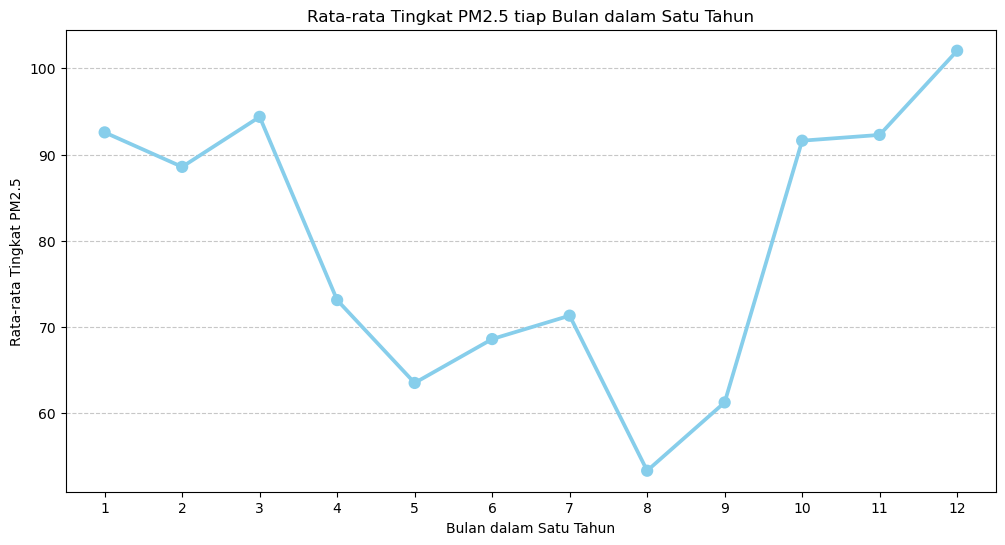

In [ ]:
#Rata-rata tingkatan polutan tiap bulannya dalam satu tahun

data = df[['PM2.5', 'month']].groupby(["month"]).mean().reset_index().sort_values(by='month', ascending=False)

plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='PM2.5', data=data, color='skyblue', markers='o', linestyles='-', capsize=0.2)

plt.title('Rata-rata Tingkat PM2.5 tiap Bulan dalam Satu Tahun')
plt.xlabel('Bulan dalam Satu Tahun')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Rata-rata polutan paling rendah terjadi pada bulan ke-8 dan memuncak pada akhir tahun yaitu bulan ke-12

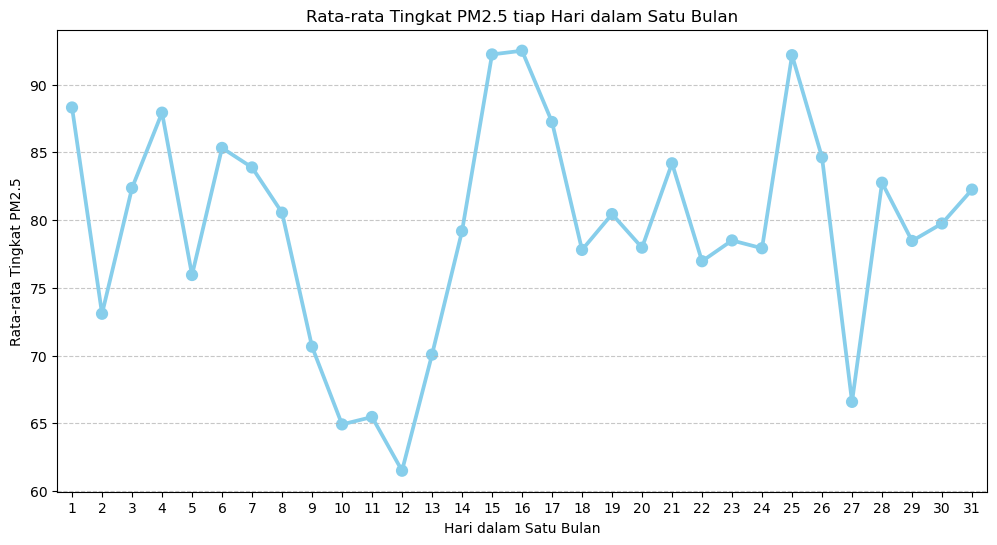

In [ ]:
#Rata-rata tingkatan polutan tiap hari dalam satu bulan

data = df[['PM2.5', 'day']].groupby(["day"]).mean().reset_index().sort_values(by='day', ascending=False)

plt.figure(figsize=(12, 6))
sns.pointplot(x='day', y='PM2.5', data=data, color='skyblue', markers='o', linestyles='-', capsize=0.2)

plt.title('Rata-rata Tingkat PM2.5 tiap Hari dalam Satu Bulan')
plt.xlabel('Hari dalam Satu Bulan')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Rata-rata polutan terendah terjadi pada tanggal 12 dan memuncak pada tanggal 16

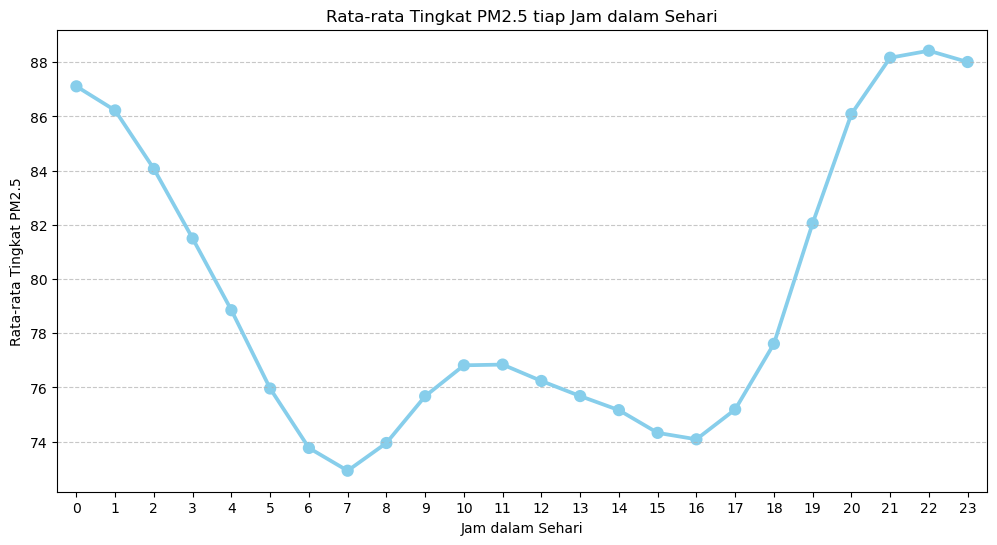

In [ ]:
#Rata-rata tingkatan polutan tiap jam dalam satu hari

data = df[['PM2.5', 'hour']].groupby(["hour"]).mean().reset_index().sort_values(by='hour', ascending=False)

plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='PM2.5', data=data, color='skyblue', markers='o', linestyles='-', capsize=0.2)

plt.title('Rata-rata Tingkat PM2.5 tiap Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Rata-rata polutan menurun pada saat jam kerja dan kembali memuncak pada tengah malam.

Menggunakan heatmap untuk menggambarkan korelasi antara polutan dan variabel waktu

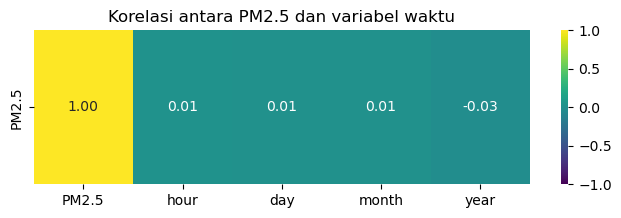

In [ ]:
#Heatmap korelasi tiap variabel

columns_of_interest = ['PM2.5', 'hour', 'day', 'month', 'year']
subset_data2 = df[columns_of_interest]

corr_matrix = subset_data2.corr()

corr_with_pm25 = corr_matrix.loc[['PM2.5'], :]

plt.figure(figsize=(8, 2))
ax = sns.heatmap(corr_with_pm25, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('Korelasi antara PM2.5 dan variabel waktu')
plt.show()

Melihat dari grafik diatas, tidak ditemukannya hubungan antara satuan waktu dan konsentrasi polutan

### Pertanyaan 2: Apa hubungan variabel SO2, NO2, dan CO terhadap perubahan tingkatan PM?

Menggunakan line chart untuk membandingkan perubahan variabel SO2, NO2, dan CO terhadap PM2.5

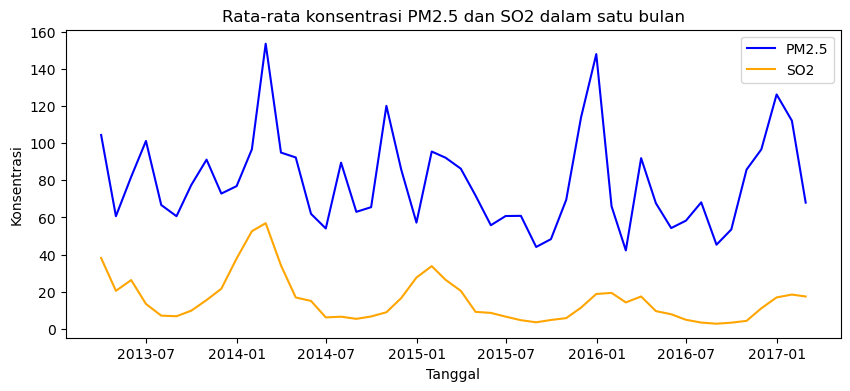

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_time_series = df[['date', 'PM2.5', 'SO2', 'NO2', 'CO']].set_index('date').resample('M').mean()

plt.figure(figsize=(10, 4))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['SO2'], label='SO2', color='orange')
plt.title('Rata-rata konsentrasi PM2.5 dan SO2')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

Konsentrasi SO2 naik seiring naiknya Konsentrasi PM2.5

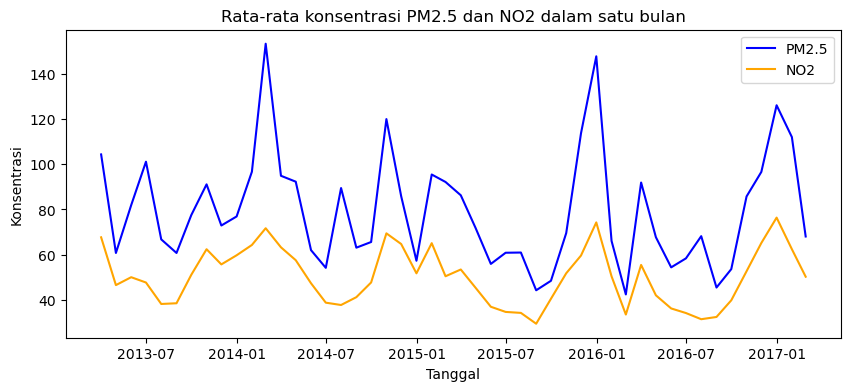

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='orange')
plt.title('Rata-rata konsentrasi PM2.5 dan NO2')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()

Konsentrasi NO2 juga naik seiring kenaikan konsentrasi PM2.5 namun dengan grafik yang lebih mirip

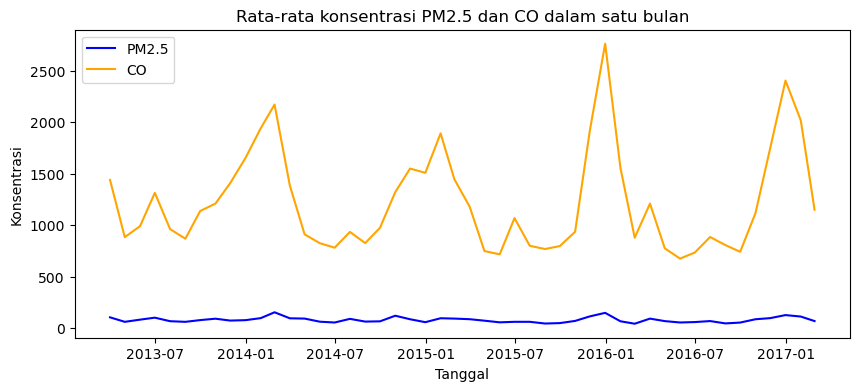

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['CO'], label='CO', color='orange')
plt.title('Rata-rata konsentrasi PM2.5 dan CO')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()

Konsentrasi CO walau jauh lebih sedikit masih mengikuti grafik konsentrasi PM2.5

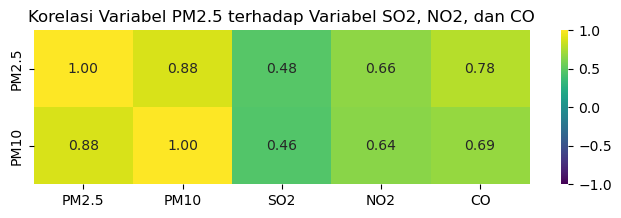

In [ ]:
#Heatmap korelasi tiap variabel

columns_of_interest = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']
subset_data2 = df[columns_of_interest]

corr_matrix = subset_data2.corr()

corr_with_pm25 = corr_matrix.loc[['PM2.5','PM10'], :]

plt.figure(figsize=(8, 2))
ax = sns.heatmap(corr_with_pm25, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('Korelasi Variabel PM2.5 terhadap Variabel SO2, NO2, dan CO')
plt.show()

Pada headmap menunjukkan bahwa terdapat korelasi Positif antara Konsentrasi PM2.5 dengan SO2, NO2, dan CO. Hal ini didukung juga dengan informasi dari luar yang menyatakan bahwasannya mayoritas polutan udara merupakan SO2, NO2, dan CO.

### Pertanyaan 3: Stasiun manakah yang memiliki tingkat polutan terendah dan tertinggi?

Menggunakan barplot untuk menunjukkan perbandingan dari tiap stasiun akan kadar polutan

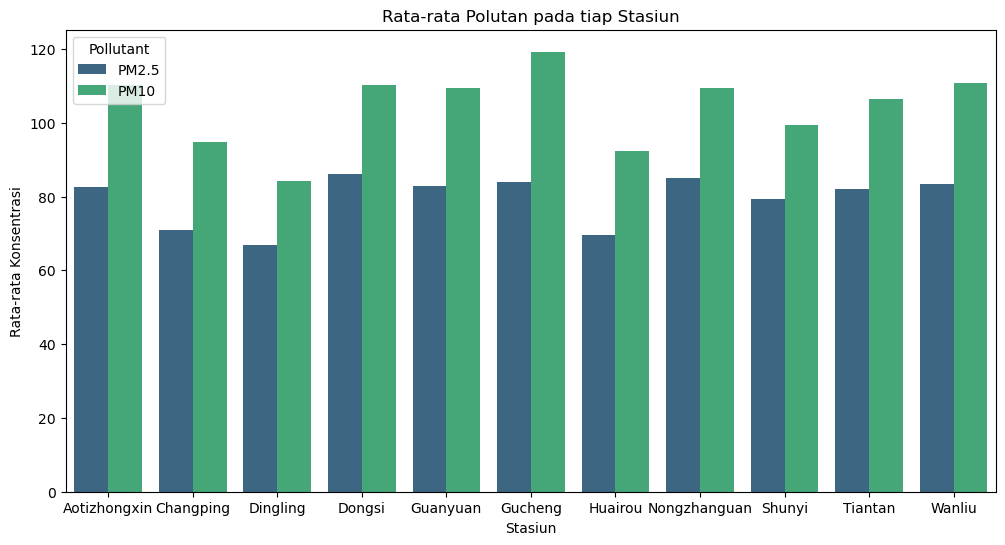

In [63]:
pollutant_means = df.groupby(["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
}).reset_index()

pollutant_means_melted = pollutant_means.melt(id_vars="station", var_name="Pollutant", value_name="Mean Concentration")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="station", y="Mean Concentration", hue="Pollutant", data=pollutant_means_melted, palette="viridis")
plt.title('Rata-rata Polutan pada tiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata Konsentrasi')
plt.show()

Membuat barplot yang sama namun dengan highlight terhadap stasiun yang memiliki konsentrasi polutan tertinggi dan terendah

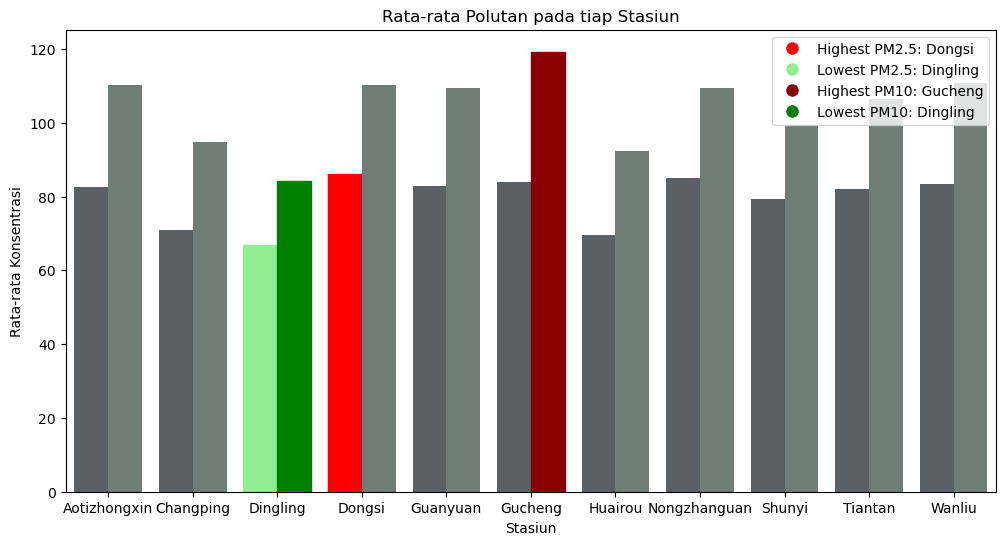

In [74]:
pollutant_means = df.groupby(["station"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    }).reset_index()

pollutant_means_melted = pollutant_means.melt(id_vars="station", var_name="Pollutant", value_name="Mean Concentration")

max_pm25_station = pollutant_means.loc[pollutant_means['PM2.5'].idxmax(), 'station']
min_pm25_station = pollutant_means.loc[pollutant_means['PM2.5'].idxmin(), 'station']
max_pm10_station = pollutant_means.loc[pollutant_means['PM10'].idxmax(), 'station']
min_pm10_station = pollutant_means.loc[pollutant_means['PM10'].idxmin(), 'station']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="station", y="Mean Concentration", hue="Pollutant", data=pollutant_means_melted, palette="viridis", saturation=0.1)

# Highlight the highest and lowest values for PM2.5 and PM10
for bar in ax.patches:
    if bar.get_height() == pollutant_means_melted.loc[(pollutant_means_melted['Pollutant'] == 'PM2.5') & (pollutant_means_melted['station'] == max_pm25_station), 'Mean Concentration'].values[0]:
        bar.set_color('red')  # Highlight highest PM2.5
    elif bar.get_height() == pollutant_means_melted.loc[(pollutant_means_melted['Pollutant'] == 'PM2.5') & (pollutant_means_melted['station'] == min_pm25_station), 'Mean Concentration'].values[0]:
        bar.set_color('lightgreen')  # Highlight lowest PM2.5
    elif bar.get_height() == pollutant_means_melted.loc[(pollutant_means_melted['Pollutant'] == 'PM10') & (pollutant_means_melted['station'] == max_pm10_station), 'Mean Concentration'].values[0]:
        bar.set_color('darkred')  # Highlight highest PM10
    elif bar.get_height() == pollutant_means_melted.loc[(pollutant_means_melted['Pollutant'] == 'PM10') & (pollutant_means_melted['station'] == min_pm10_station), 'Mean Concentration'].values[0]:
        bar.set_color('green')  # Highlight lowest PM10

legend_labels = [
    f'Highest PM2.5: {max_pm25_station}',
    f'Lowest PM2.5: {min_pm25_station}',
    f'Highest PM10: {max_pm10_station}',
    f'Lowest PM10: {min_pm10_station}',
]

legend_colors = ['red', 'lightgreen', 'darkred', 'green']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

plt.legend(legend_patches, legend_labels, loc='upper right')
plt.title('Rata-rata Polutan pada tiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata Konsentrasi')
plt.show()

In [ ]:
df.groupby(["station"]).agg({
        "PM2.5" : "mean",
        "PM10" : "mean",
    })

,PM2.5,PM10
station,,
Aotizhongxin,82.540623,110.210033
Changping,70.986438,94.788575
Dingling,66.845557,84.113713
Dongsi,86.144243,110.347617
Guanyuan,82.897522,109.372349
Gucheng,84.074802,119.261567
Huairou,69.501747,92.422670
Nongzhanguan,85.079472,109.384022
Shunyi,79.437962,99.271936


Dari grafik diatas dapat dilihat bahwa Stasiun Gucheng memiliki rata-rata konsentrasi PM10 terbesar dan stasiun Dongsi memiliki rata-rata konsentrasi PM2.5 terbesar. Rata-rata konsentrasi polutan PM2.5 dan PM10 terendah ada pada stasiun Dingling

## Conclusion

- Polutan terutama PM2.5 ditinjau dari heatmap tidak memiliki hubungan dengan satuan waktu seperti jam, hari, serta bulan. Namun, dari grafik pointchart terdapat pola yang diberikan seperti memuncaknya polutan pada akhir tahun serta menurunnya polutan pada jam kerja, alasan dari kejadian tersebut belum diketahui.
- Konsentrasi PM2.5 dan PM10 memiliki korelasi tinggi serta positif terhadap konsentrasi NO2, SO2, serta CO ditinjau dari grafik heatmap. Hal ini memperkuat informasi bahwa NO2, SO2, dan CO merupakan mayoritas polutan di udara. CO memiliki korelasi teringgi terhadap PM2.5 dan PM10. 
- Stasiun Gucheng memiliki rata-rata konsentrasi PM10 terbesar (119) dan stasiun Dongsi memiliki rata-rata konsentrasi PM2.5 terbesar(86). Rata-rata konsentrasi polutan PM2.5 (66) dan PM10 (84) terendah ada pada stasiun Dingling